In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
# Load Data
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2, np.newaxis]

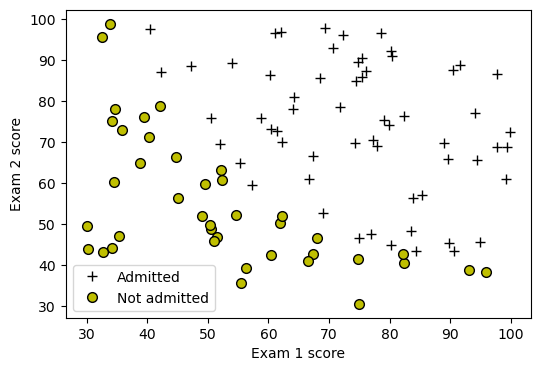

In [3]:
pos = X[(y == 1).repeat(1)]
neg = X[(y == 0).repeat(1)]

fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(pos[:, 0], pos[:, 1], 'k+', linewidth=2, markersize=7, label='Admitted')
ax1.plot(neg[:, 0], neg[:, 1], 'ko', markerfacecolor='y', markersize=7, label='Not admitted')

ax1.set_xlabel('Exam 1 score')
ax1.set_ylabel('Exam 2 score')

ax1.legend()
# ax1.legend(['Admitted', 'Not admitted'])

In [4]:
def sigmoid(z):
	g = 1 / (1 + np.exp(-z))
	return g

In [5]:
sigmoid(0)

0.5

In [6]:
def costFunction(theta, X, y):
	theta = theta.reshape(-1, 1)  # 使用库函数优化会传入(n, )array，为了运算统一转化为(n, 1)array
	m = y.size
	J = np.sum(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta))) / m
	# grad = np.sum((sigmoid(X @ theta) - y) * X, axis=0) / m       # 根据矩阵乘法优化
	grad = X.T @ (sigmoid(X @ theta) - y) / m
	return J, grad

In [7]:
m, n = X.shape

X = np.concatenate((np.ones((m, 1)), X), axis=1)

initial_theta = np.zeros((n + 1, 1))

In [8]:
cost, grad = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros): {:f}\n'.format(cost))

Cost at initial theta (zeros): 0.693147



In [9]:
print('Gradient at initial theta (zeros):\n{}'.format(grad))

Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [10]:
test_theta = np.array([[-24], [0.2], [0.2]])
cost, grad = costFunction(test_theta, X, y)
print('Cost at non-zero test theta: {:f}'.format(cost))

Cost at non-zero test theta: 0.218330


In [11]:
print('Gradient at non-zero theta:\n{}\n'.format(grad))

Gradient at non-zero theta:
[[0.04290299]
 [2.56623412]
 [2.64679737]]



In [12]:
# initial_theta = np.zeros(3)       # theta被传入后,会被转换为(n, )array，不需要手动变化
res = op.fmin_tnc(func=costFunction, x0=initial_theta, args=(X, y))
print(res)

(array([-25.16131857,   0.20623159,   0.20147149]), 36, 0)


In [13]:
# 使用minimize，损失函数和梯度下降函数分开实现
def costFunction(theta, X, y):
	theta = theta.reshape(-1, 1)
	m = y.size
	J = np.sum(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta))) / m
	return J


def gradient(theta, X, y):
	theta = theta.reshape(-1, 1)
	m = y.size
	grad = X.T @ (sigmoid(X @ theta) - y) / m
	return grad


initial_theta = np.zeros(n + 1)
res = op.minimize(fun=costFunction, x0=initial_theta, args=(X, y), method='TNC', jac=gradient)
print(res)

     fun: 0.20349770158947464
     jac: array([[9.56475235e-09],
       [1.37863724e-07],
       [4.94652395e-07]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131857,   0.20623159,   0.20147149])


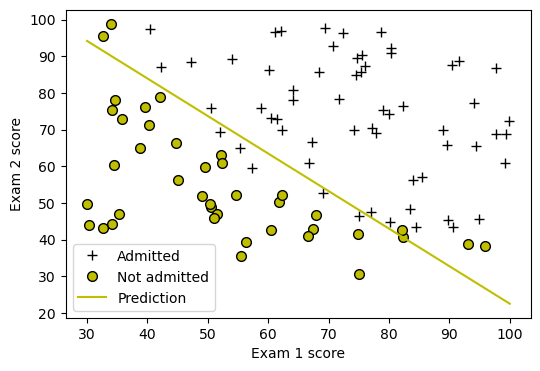

In [14]:
boundary_x = np.linspace(30, 100, 100)
# 决策边界 theta.T @ X = 0
theta = res.x
boundary_y = (- theta[0] - theta[1] * boundary_x) / theta[2]
ax1.plot(boundary_x, boundary_y, 'y', label='Prediction')

ax1.get_legend().remove()
ax1.legend()
fig1

In [15]:
prob = sigmoid(np.array([1, 45, 85]).reshape(1, -1) @ theta.reshape(-1, 1))
print('For a student with scores 45 and 85, we predict an admission probability of {:f}'.format(*prob.flatten()))

For a student with scores 45 and 85, we predict an admission probability of 0.776291


In [16]:
def predict(theta, X):
	p = sigmoid(X @ theta.reshape(-1, 1))
	p[p >= 0.5] = 1
	p[p < 0.5] = 0
	return p

In [17]:
p = predict(theta, X)
print('Train Accuracy: {:.1f}%'.format(np.mean(p == y) * 100))

Train Accuracy: 89.0%


In [18]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2, np.newaxis]

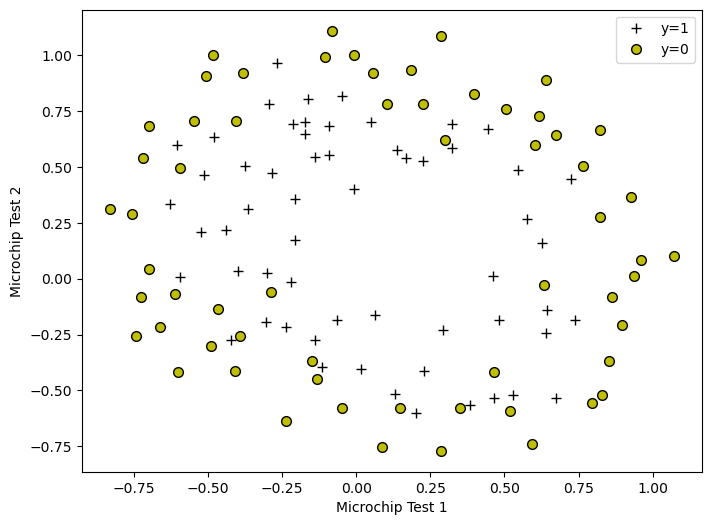

In [19]:
pos = X[(y == 1).repeat(1)]
neg = X[(y == 0).repeat(1)]

fig2, ax2 = plt.subplots(figsize=(8, 6))

ax2.plot(pos[:, 0], pos[:, 1], 'k+', linewidth=2, markersize=7, label='y=1')
ax2.plot(neg[:, 0], neg[:, 1], 'ko', markerfacecolor='y', markersize=7, label='y=0')

ax2.set_xlabel('Microchip Test 1')
ax2.set_ylabel('Microchip Test 2')

ax2.legend()
# ax2.legend(['Admitted', 'Not admitted'])

In [20]:
def mapFeature(X1, X2):
	degree = 6
	out = np.ones(X1.shape)

	for i in range(1, degree + 1):
		for j in range(i + 1):
			out = np.append(out, np.power(X1, (i - j)) * np.power(X2, j), axis=1)
	return out

In [21]:
X = mapFeature(X[:, 0, np.newaxis], X[:, 1, np.newaxis])

In [22]:
def costFunctionReg(theta, X, y, lambda_opt):
	theta = theta.reshape(-1, 1)
	j = theta.shape[0]
	m = y.shape[0]

	J = np.sum(
		-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta))) / m + lambda_opt / 2 / m * np.sum(
		np.power(theta[1:, :], 2))

	grad = np.zeros(j)
	grad[0] = np.sum((sigmoid(X @ theta) - y) * X[:, 0, np.newaxis]) / m
	for i in range(1, j):
		grad[i] = np.sum((sigmoid(X @ theta) - y) * X[:, i, np.newaxis]) / m + lambda_opt / m * theta[i, 0]
	return J, grad

In [23]:
initial_theta = np.zeros((X.shape[1]))

lambda_opt = 1

cost, grad = costFunctionReg(initial_theta, X, y, lambda_opt)
print('Cost at initial theta (zeros): {:f}'.format(cost))

Cost at initial theta (zeros): 0.693147


In [24]:
print('Gradient at initial theta (zeros) - first five values only:\n{}'.format(grad[:5].reshape(-1, 1)))

Gradient at initial theta (zeros) - first five values only:
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [25]:
test_theta = np.ones(X.shape[1])

cost, grad = costFunctionReg(test_theta, X, y, 10)
print('Cost at test theta (with lambda = 10): {:f}'.format(cost))

Cost at test theta (with lambda = 10): 3.164509


In [26]:
print('Gradient at test theta - first five values only:\n{}'.format(grad[:5].reshape(-1, 1)))

Gradient at test theta - first five values only:
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


In [27]:
lambda_opt = 0
res = op.fmin_tnc(func=costFunctionReg, x0=initial_theta, args=(X, y, lambda_opt))
theta = res[0]
print(res)

(array([  10.62386513,   14.52231429,    5.05931792, -101.2052835 ,
        -58.59798714,  -48.71725354, -117.41600778,  -76.29690443,
        -35.38622933,    3.27238375,  364.45701035,  308.45323401,
        422.44813363,  210.70285947,   81.35388513,  215.77836659,
        265.59666233,  270.97378827,   92.79011498,   16.87793255,
         -4.12886249, -450.23426115, -544.58998709, -768.9601029 ,
       -517.67444539, -528.03538433, -237.34191156,  -58.1753347 ]), 280, 3)


In [28]:
# 使用minimize，损失函数和梯度下降函数分开实现
def costFunctionReg(theta, X, y, lambda_opt):
	theta = theta.reshape(-1, 1)
	j = theta.shape[0]
	m = y.shape[0]

	J = np.sum(
		-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta))) / m + lambda_opt / 2 / m * np.sum(
		np.power(theta[1:, :], 2))
	return J


def gradientReg(theta, X, y, lambda_opt):
	theta = theta.reshape(-1, 1)
	j = theta.shape[0]
	m = y.shape[0]

	grad = np.zeros(j)
	grad[0] = np.sum((sigmoid(X @ theta) - y) * X[:, 0, np.newaxis]) / m
	for i in range(1, j):
		grad[i] = np.sum((sigmoid(X @ theta) - y) * X[:, i, np.newaxis]) / m + lambda_opt / m * theta[i, 0]
	return grad


lambda_opt = 1
initial_theta = np.zeros((X.shape[1]))
res = op.minimize(fun=costFunctionReg, x0=initial_theta, args=(X, y, lambda_opt), method='TNC', jac=gradientReg)
print(res)

     fun: 0.5290027299644856
     jac: array([-2.14979324e-06,  6.79501592e-07, -3.48723880e-07,  8.76213800e-07,
       -4.08625633e-08, -9.33258822e-07, -5.14464383e-07,  1.71212333e-08,
        1.55580997e-08, -9.72430432e-07,  6.97428291e-08,  3.55015379e-08,
       -2.79328033e-07,  1.79678968e-07,  2.33537546e-07,  1.47203505e-07,
       -2.11707905e-07,  6.16711035e-07, -9.29158029e-08, -5.27495370e-08,
       -1.48140324e-06,  2.31250228e-07,  1.80322400e-07, -1.31904546e-07,
       -7.16787063e-08, -4.12316454e-07,  1.65228998e-08, -7.34611525e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516292,
       -1.45817009, -0.05098418, -0.61558552, -0.27469165, -1.19271298,
       -0.2421784 , -0.20603297, -0.04466178, -0.27778952, -0.29539513,
       -0.45645981, -1.04319155,  0.027793

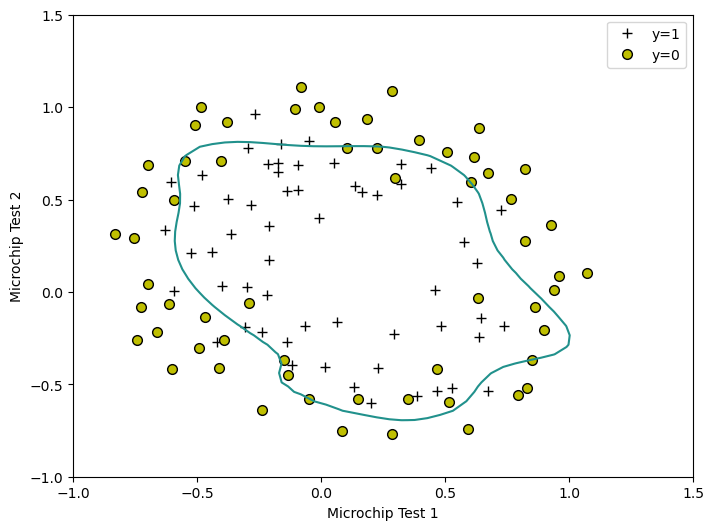

In [29]:
boundary_u = np.mat(np.linspace(-1, 1.5, 50)).reshape(-1, 1)
boundary_v = np.mat(np.linspace(-1, 1.5, 50)).reshape(-1, 1)

z = np.zeros((len(boundary_u), len(boundary_v)))


def mapFeature(X1, X2):
	degree = 6
	out = np.ones(X1.shape)
	for i in range(1, degree + 1):
		for j in range(i + 1):
			out = np.append(out, np.power(X1, (i - j)) * np.power(X2, j), axis=1)
	return out


for i in range(len(boundary_u)):
	for j in range(len(boundary_v)):
		z[i, j] = (mapFeature(boundary_u[i], boundary_v[j]) @ theta)

u, v = np.meshgrid(boundary_u, boundary_v)
ax2.contour(u, v, z, levels=0)

fig2

In [30]:
p = predict(theta, X)
print('Train Accuracy: {:f}'.format(np.mean(p == y) * 100))

Train Accuracy: 87.288136
